## Libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Preprocess data
def preprocess(df):
    mon = np.array(df["Price"])
    wait = []
    for i in mon:
        i = float(i.replace(',',''))
        wait.append(i)
    tue = np.array(wait)
    df["Price"] = tue
    return df

def sumPairs(df):
    ndata = df.count() - 1 # Karena selisih pasangan pertama, maka jumlah data menjadi n-1
    lst = df.tolist()
    diffs = []
    for i in range(len(lst)):
        if(i+1 != len(lst)):
            diffs.append(abs(lst[i]-lst[i+1]))
              
    return float(sum(diffs))/ndata

def justround(x, base):
    return int(round(x / base)) * base

def roundbase(lengs):
    if(lengs > 0.1 and lengs <= 1 ):
        base = 0.1
        lengs = justround(lengs,base)
    elif(lengs > 1 and lengs <= 10 ):
        base = 1
        lengs = justround(lengs,base)
    elif(lengs > 10 and lengs <= 100 ):
        base = 10
        lengs = justround(lengs,base)
    elif(lengs > 100 and lengs <= 1000 ):
        base = 100
        lengs = justround(lengs,base)
    elif(lengs > 1000 and lengs <= 10000 ):
        base = 1000
        lengs = justround(lengs,base)
    return lengs

## Loading Data

In [4]:
# loading data USD-IDR
usdidr = pd.read_csv("dataset/USD-IDR.csv", delimiter=',')
closeusdidr = usdidr[["Date","Price"]]
closeusdidr = preprocess(closeusdidr)
#closeusdidr = closeusdidr.iloc[:10]
closeusdidr

FileNotFoundError: ignored

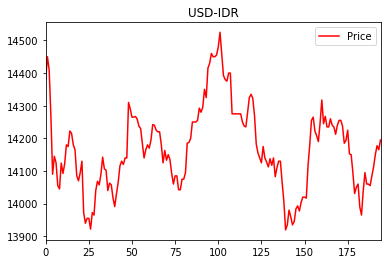

In [ ]:
closeusdidr.plot(kind="line", color="red", title="USD-IDR")
plt.show()

## 1. Universe of Discourse

In [ ]:
def roundup(x, base):
    return int(math.ceil(x / base)) * base
def rounddown(x, base):
    return int(math.floor(x / base)) * base
def uod(df):
    uod = []
    max = roundup(df["Price"].max(), 100)
    min = rounddown(df["Price"].min(), 100)
    uod.append(min)
    uod.append(max)
    return uod
uodusd = uod(closeusdidr)
print(uodusd)

[13900, 14600]


## 2. Average Based Length

In [ ]:
# 2. Average Based Length
def avgbasedleng(df):
    avgdiff = sumPairs(df)
    lengs = avgdiff/2
    return roundbase(lengs)

interval = avgbasedleng(closeusdidr["Price"])
print(interval)

20


## 3. Mendefinisikan interval

In [ ]:
def definterval(uod,intv):
    frst = uod[0]
    sec = uod[0]+intv
    dif = uod[1]-uod[0]
    nintv = round(dif/intv)
    df1 = pd.DataFrame(columns=['Ai', 'Interval'])
    for i in range(1, nintv+1):
        if(i != nintv):
            df1 = df1.append({'Ai': "A" + str(i), 'Interval': (frst,sec)}, ignore_index=True)
        else:
            df1 = df1.append({'Ai': "A" + str(i), 'Interval': (frst,uod[1])}, ignore_index=True)
        frst = frst + intv
        sec = sec + intv
    return df1
intervals = definterval(uodusd,interval)
#export_csv = intervals.to_csv ('defintvusd.csv', index = None, header=True)
intervals
# To access interval, use arr = intervals['Interval'], then use arr[nomorbaris][0/1] with 0 batas bawah & 1 batas atas

,Ai,Interval
0,A1,"(13900, 13920)"
1,A2,"(13920, 13940)"
2,A3,"(13940, 13960)"
3,A4,"(13960, 13980)"
4,A5,"(13980, 14000)"
5,A6,"(14000, 14020)"
6,A7,"(14020, 14040)"
7,A8,"(14040, 14060)"
8,A9,"(14060, 14080)"
9,A10,"(14080, 14100)"


## 4. Fuzzifikasi

In [ ]:
def fuzzify(df1,df2):
    arr = df1["Interval"]
    labels = df1["Ai"].tolist()
    bins = []
    for i in arr:
        if(i != arr[len(arr)-1]):
            bins.append(i[0])
        else :
            bins.extend(i)
    df2["Fuzzified"] = pd.cut(df2["Price"], bins=bins, labels=labels)
    train = df2.loc[:128]
    test = df2.loc[128:]
    return train, test

trainusdidr, testusdidr = fuzzify(intervals, closeusdidr)

#exporttrain = trainusdidr.to_csv ('usdfuzzifiedtrain.csv', index = None, header=True)
#exporttest = testusdidr.to_csv ('usdfuzzifiedtest.csv', index = None, header=True)
trainusdidr

c:\users\yudha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,Price,Fuzzified
0,"Jan 01, 2019",14380.0,A24
1,"Jan 02, 2019",14450.0,A28
2,"Jan 03, 2019",14410.0,A26
3,"Jan 04, 2019",14270.0,A19
4,"Jan 07, 2019",14090.0,A10
5,"Jan 08, 2019",14145.0,A13
6,"Jan 09, 2019",14125.0,A12
7,"Jan 10, 2019",14055.0,A8
8,"Jan 11, 2019",14045.0,A8
9,"Jan 14, 2019",14124.0,A12


## 5. Fuzzy Logical Relationship

In [ ]:
def relfuzzy(df):
    ings = df['Fuzzified']
    flr = pd.DataFrame(columns=['Present State', 'Next State'])
    for i in range(len(ings)-1):
        flr = flr.append({'Present State': ings[i], 'Next State': ings[i+1]}, ignore_index=True)
    return flr

flr = relfuzzy(trainusdidr)
#exportflr = flr.to_csv ('usdflr.csv', index = None, header=True)
flr

,Present State,Next State
0,A24,A28
1,A28,A26
2,A26,A19
3,A19,A10
4,A10,A13
5,A13,A12
6,A12,A8
7,A8,A8
8,A8,A12
9,A12,A10


## 6. Fuzzy Logical Relationship Group

In [ ]:
def relgroup(interval, flrdata):
    flrg = pd.DataFrame(columns=['Present State', 'Next State', '#Transitions'])
    states = interval["Ai"]
    for i in states:
        waitlis = flrdata[flrdata["Present State"] == i]['Next State'].value_counts()
        ordict = {}
        numoftransitions = sum(waitlis)
        for j in range(len(waitlis.index)):
            ordict[waitlis.index[j]] = waitlis.values[j]
        flrg = flrg.append({'Present State': i, 'Next State': ordict, '#Transitions': numoftransitions}, ignore_index=True)
    flrg['Interval'] = interval['Interval']
    return flrg

flrg = relgroup(intervals, flr)
#exportflrg = flrg.to_csv ('usdflrg.csv', index = None, header=True)
flrg

,Present State,Next State,#Transitions,Interval
0,A1,{},0,"(13900, 13920)"
1,A2,"{'A3': 1, 'A4': 1}",2,"(13920, 13940)"
2,A3,"{'A3': 1, 'A2': 1}",2,"(13940, 13960)"
3,A4,"{'A7': 1, 'A2': 1, 'A4': 1}",3,"(13960, 13980)"
4,A5,{'A7': 1},1,"(13980, 14000)"
5,A6,{'A5': 1},1,"(14000, 14020)"
6,A7,{'A9': 3},3,"(14020, 14040)"
7,A8,"{'A10': 2, 'A8': 2, 'A9': 1, 'A6': 1, 'A12': 1}",7,"(14040, 14060)"
8,A9,"{'A10': 2, 'A8': 2, 'A11': 1, 'A9': 1}",6,"(14060, 14080)"
9,A10,"{'A8': 2, 'A13': 2, 'A12': 2, 'A9': 1, 'A15': ...",9,"(14080, 14100)"


## 7. Matriks Probabilitas

In [ ]:
gengen = pd.crosstab(flr['Present State'], flr['Next State'], normalize='index')
gengen

Next State,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,...,A28,A29,A3,A32,A4,A5,A6,A7,A8,A9
Present State,,,,,,,,,,,,,,,,,,,,,
A10,0.111111,0.000000,0.222222,0.222222,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.222222,0.111111
A11,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.000000,0.000000
A12,0.142857,0.071429,0.214286,0.071429,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.071429,0.000000
A13,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
A14,0.100000,0.000000,0.300000,0.000000,0.400000,0.100000,0.000000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
A15,0.000000,0.000000,0.166667,0.166667,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
A16,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
A17,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.428571,0.000000,0.142857,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
A18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.428571,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


## 8. Peramalan/Defuzzifikasi

In [ ]:
# Model Satu, dites ke training data
def getmidpoint(x):
    for index, row in intervals.iterrows():
        if x == row['Ai']:
            j = row['Interval']
    return sum(j)/2

def defuzzifyone(baw):
    lis = list(baw.keys())
    val = list(baw.values())
    hasil = []
    for k in range(len(lis)):
        res = getmidpoint(lis[k])*(val[k]/sum(val))
        hasil.append(res)
    return sum(hasil)

def defuzzifymany(nex, fuzzy, price):
    lis = list(nex.keys())
    val = list(nex.values())
    hasil = []  
    if fuzzy in lis:
        for k in range(len(lis)):
            if lis[k] != fuzzy:
                res = getmidpoint(lis[k])*(val[k]/sum(val))
            else:
                res = price*(val[k]/sum(val))
            hasil.append(res)
    else:
        for k in range(len(lis)):
            res = getmidpoint(lis[k])*(val[k]/sum(val))
            hasil.append(res)
    return sum(hasil)

def forcast(data, relgroup):
    forecasted = [0]
    for yrow, grow in data.iterrows():
        for index, row in relgroup.iterrows():
            if grow['Fuzzified'] == row['Present State']:
                forecast = 0
                if row['#Transitions'] == 0:
                    forecast = getmidpoint(grow['Fuzzified'])
                if row['#Transitions'] == 1:
                    forecast = defuzzifyone(row['Next State'])
                if row['#Transitions'] > 1:
                    forecast = defuzzifymany(row['Next State'], grow['Fuzzified'], grow['Price'])
                forecasted.append(forecast)
    return forecasted[:len(forecasted)-1]

restrain = trainusdidr.copy()
restrain['Hasil Forecast'] = forcast(restrain, flrg)
restrain
#exporthasiltrain = restrain.to_csv ('result/usdhasildefuzztrain.csv', index = None, header=True)

,Date,Price,Fuzzified,Hasil Forecast
0,"Jan 01, 2019",14380.0,A24,0.000000
1,"Jan 02, 2019",14450.0,A28,14406.666667
2,"Jan 03, 2019",14410.0,A26,14436.666667
3,"Jan 04, 2019",14270.0,A19,14350.000000
4,"Jan 07, 2019",14090.0,A10,14253.076923
5,"Jan 08, 2019",14145.0,A13,14112.222222
6,"Jan 09, 2019",14125.0,A12,14125.000000
7,"Jan 10, 2019",14055.0,A8,14130.357143
8,"Jan 11, 2019",14045.0,A8,14071.428571
9,"Jan 14, 2019",14124.0,A12,14068.571429


In [ ]:
# Model dua, dites ke test data
restest = testusdidr.copy()
restest["Hasil Forecast"] = forcast(restest, flrg)
restest
#exporthasiltest = restest.to_csv ('result/usdhasildefuzztest.csv', index = None, header=True)

,Date,Price,Fuzzified,Hasil Forecast
128,"Jun 28, 2019",14127.5,A12,0.000000
129,"Jul 01, 2019",14112.5,A11,14130.892857
130,"Jul 02, 2019",14137.5,A12,14100.625000
131,"Jul 03, 2019",14117.5,A11,14133.035714
132,"Jul 04, 2019",14140.0,A12,14101.875000
133,"Jul 05, 2019",14082.5,A10,14133.571429
134,"Jul 08, 2019",14110.0,A11,14111.388889
135,"Jul 09, 2019",14130.0,A12,14100.000000
136,"Jul 10, 2019",14130.0,A12,14131.428571
137,"Jul 11, 2019",14065.0,A9,14131.428571


## 9. Penghitungan Nilai Penyesuaian

In [ ]:
def buatcompare(tes):
    wait = []
    for i in tes:
        i = int(i.replace('A',''))
        wait.append(i)
    return wait

def jump(x, y):
    z = abs(x-y)
    tanda = True
    if z > 1:
        tanda = True
    else:
        tanda = False
    return tanda

def findadjval(rester):
    wek = rester["Fuzzified"].tolist()
    liswait = buatcompare(wek)
    adjustval = [0]
    for j in range(len(liswait)-1):
        dt1 = 0
        dt2 = 0
        arrdt = []
        if not(jump(liswait[j],liswait[j+1])):
            if liswait[j] < liswait[j+1]:
                dt1 = interval/2
            if liswait[j] > liswait[j+1]:
                dt1 = -interval/2
            adjustval.append(dt1)
        else:
            if liswait[j] < liswait[j+1]:
                v = liswait[j+1] - liswait[j]
                dt2 = (interval/2)*v
            if liswait[j] > liswait[j+1]:
                s = liswait[j] - liswait[j+1]
                dt2 = -(interval/2)*s
            adjustval.append(dt2)
    return adjustval

In [ ]:
# Untuk training set

restrain['Adjusting Value'] = findadjval(restrain)
hasiltrain = restrain.iloc[1:]
hasiltrain
#exportadjvaltrain = hasiltrain.to_csv ('result/usdhasiladjvaltrain.csv', index = None, header=True)

,Date,Price,Fuzzified,Hasil Forecast,Adjusting Value
1,"Jan 02, 2019",14450.0,A28,14406.666667,40.0
2,"Jan 03, 2019",14410.0,A26,14436.666667,-20.0
3,"Jan 04, 2019",14270.0,A19,14350.000000,-70.0
4,"Jan 07, 2019",14090.0,A10,14253.076923,-90.0
5,"Jan 08, 2019",14145.0,A13,14112.222222,30.0
6,"Jan 09, 2019",14125.0,A12,14125.000000,-10.0
7,"Jan 10, 2019",14055.0,A8,14130.357143,-40.0
8,"Jan 11, 2019",14045.0,A8,14071.428571,0.0
9,"Jan 14, 2019",14124.0,A12,14068.571429,40.0
10,"Jan 15, 2019",14092.5,A10,14130.142857,-20.0


In [ ]:
# Untuk test set

restest["Adjusting Value"] = findadjval(restest)
hasiltest = restest.iloc[1:]
hasiltest
#exportadjvaltest = hasiltest.to_csv ('result/usdhasiladjvaltest.csv', index = None, header=True)

,Date,Price,Fuzzified,Hasil Forecast,Adjusting Value
129,"Jul 01, 2019",14112.5,A11,14130.892857,-10.0
130,"Jul 02, 2019",14137.5,A12,14100.625000,10.0
131,"Jul 03, 2019",14117.5,A11,14133.035714,-10.0
132,"Jul 04, 2019",14140.0,A12,14101.875000,10.0
133,"Jul 05, 2019",14082.5,A10,14133.571429,-20.0
134,"Jul 08, 2019",14110.0,A11,14111.388889,10.0
135,"Jul 09, 2019",14130.0,A12,14100.000000,10.0
136,"Jul 10, 2019",14130.0,A12,14131.428571,0.0
137,"Jul 11, 2019",14065.0,A9,14131.428571,-30.0
138,"Jul 12, 2019",14007.0,A6,14075.833333,-30.0


## 10. Penyesuaian hasil peramalan dengan nilai penyesuaian

In [ ]:
# 10. Penyesuaian hasil peramalan
def adjustingval(lasttest):
    valadjusted = []
    for index, row in lasttest.iterrows():
        newprice = row['Hasil Forecast']+row['Adjusting Value']
        valadjusted.append(newprice)
    return valadjusted

In [ ]:
# Penyesuaian train set
hasiltrain['Adjusted Value'] = adjustingval(hasiltrain)
hasiltrain
#exportadjtrain = hasiltrain.to_csv ('result/usdadjustedtrain.csv', index = None, header=True)

c:\users\yudha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Price,Fuzzified,Hasil Forecast,Adjusting Value,Adjusted Value
1,"Jan 02, 2019",14450.0,A28,14406.666667,40.0,14446.666667
2,"Jan 03, 2019",14410.0,A26,14436.666667,-20.0,14416.666667
3,"Jan 04, 2019",14270.0,A19,14350.000000,-70.0,14280.000000
4,"Jan 07, 2019",14090.0,A10,14253.076923,-90.0,14163.076923
5,"Jan 08, 2019",14145.0,A13,14112.222222,30.0,14142.222222
6,"Jan 09, 2019",14125.0,A12,14125.000000,-10.0,14115.000000
7,"Jan 10, 2019",14055.0,A8,14130.357143,-40.0,14090.357143
8,"Jan 11, 2019",14045.0,A8,14071.428571,0.0,14071.428571
9,"Jan 14, 2019",14124.0,A12,14068.571429,40.0,14108.571429
10,"Jan 15, 2019",14092.5,A10,14130.142857,-20.0,14110.142857


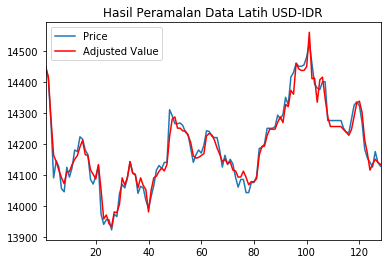

In [ ]:
# Plot Train
ax = plt.gca()

hasiltrain.plot(kind='line',y='Price', ax=ax)
hasiltrain.plot(kind='line',y='Adjusted Value', color='red',ax=ax, title="Hasil Peramalan Data Latih USD-IDR")

plt.show()

In [ ]:
# Penyesuaian test set
hasiltest['Adjusted Value'] = adjustingval(hasiltest)
hasiltest
#exportadjtest = hasiltest.to_csv ('result/usdadjustedtest.csv', index = None, header=True)

c:\users\yudha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Price,Fuzzified,Hasil Forecast,Adjusting Value,Adjusted Value
129,"Jul 01, 2019",14112.5,A11,14130.892857,-10.0,14120.892857
130,"Jul 02, 2019",14137.5,A12,14100.625000,10.0,14110.625000
131,"Jul 03, 2019",14117.5,A11,14133.035714,-10.0,14123.035714
132,"Jul 04, 2019",14140.0,A12,14101.875000,10.0,14111.875000
133,"Jul 05, 2019",14082.5,A10,14133.571429,-20.0,14113.571429
134,"Jul 08, 2019",14110.0,A11,14111.388889,10.0,14121.388889
135,"Jul 09, 2019",14130.0,A12,14100.000000,10.0,14110.000000
136,"Jul 10, 2019",14130.0,A12,14131.428571,0.0,14131.428571
137,"Jul 11, 2019",14065.0,A9,14131.428571,-30.0,14101.428571
138,"Jul 12, 2019",14007.0,A6,14075.833333,-30.0,14045.833333


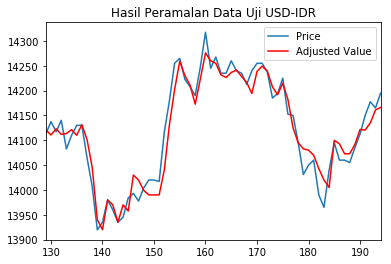

In [ ]:
# Plot Test
av = plt.gca()

hasiltest.plot(kind='line',y='Price', ax=av)
hasiltest.plot(kind='line',y='Adjusted Value', color='red',ax=av, title="Hasil Peramalan Data Uji USD-IDR")

plt.show()

## 11. Evaluasi dengan MAPE, MSE, dan Dstat

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square(y_true - y_pred))
    
def directional_statistics(y_true, y_pred):
    sign = 0
    arrdstat = []
    for i in range(len(y_true)-1):
        cond = (y_pred[i+1]-y_true[i])*(y_true[i+1]-y_true[i])
        if cond >= 0 :
            at = 1
        else:
            at = 0
        arrdstat.append(at)
    arrdstat = np.array(arrdstat)
    return np.mean(arrdstat) * 100

In [ ]:
# Evaluasi Train
evaltrain = hasiltrain.copy()
y_true = evaltrain['Price'].tolist()
y_pred = evaltrain['Adjusted Value'].tolist()

print("Hasil Evaluasi Data Latih USD-IDR")
print("MAPE\t=\t" + str(mean_absolute_percentage_error(y_true, y_pred)) + " %")
print("MSE\t=\t" + str(mean_squared_error(y_true, y_pred)))
print("Dstat\t=\t" + str(directional_statistics(y_true, y_pred)) + " %")

Hasil Evaluasi Data Latih USD-IDR
MAPE	=	0.1300432534418653 %
MSE	=	590.7919134931285
Dstat	=	86.61417322834646 %


In [ ]:
# Evaluasi Test
evaltest = hasiltest.copy()
y_true = evaltest['Price'].tolist()
y_pred = evaltest['Adjusted Value'].tolist()

print("Hasil Evaluasi Data Uji USD-IDR")
print("MAPE\t=\t" + str(mean_absolute_percentage_error(y_true, y_pred)) + " %")
print("MSE\t=\t" + str(mean_squared_error(y_true, y_pred)))
print("Dstat\t=\t" + str(directional_statistics(y_true, y_pred)) + " %")

Hasil Evaluasi Data Uji USD-IDR
MAPE	=	0.15161090559338253 %
MSE	=	741.7777602529485
Dstat	=	86.15384615384616 %
